## Running t-test over the results (simulations)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import ttest_rel
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

## Aux funcs

In [3]:
def get_data(results_path):
    return pd.read_csv(
        results_path, 
        usecols=['GroupLasso', 'MrRCE', 'OLS', 'Ridge', 'rho', 'MRCE']
    )

In [4]:
def melt(data):
    return data.melt(
        id_vars='rho', 
        var_name='model', 
        value_name='err'
    )

In [5]:
def plot(data, figsize=(15, 5), ax=None, legend=True):
    fig = None
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    to_plot = data.groupby('rho', as_index=False).mean().melt(id_vars='rho')
    
    colors = ["#ea645d", "#e8b27d", "#83bc7e", "#557fa2", "#8354a1"]
    style = dict(
        OLS=("#ea645d", "+", "--"),
        GroupLasso=("#e8b27d", "x", (0, (5, 8))),
        Ridge=("#83bc7e", "*", "-"),
        MRCE=("#557fa2", "d", (0, (3, 1, 1, 1, 1, 1))),
        MrRCE=("#8354a1", "s", (0, (3, 3, 1, 3)))
    )

    for model, color_shape_line in style.items():
        tmp = to_plot.loc[to_plot.variable == model].copy()
        ax.plot(
            tmp.rho, 
            tmp.value, 
            label=model, 
            c=color_shape_line[0], 
            marker=color_shape_line[1],
            linestyle=color_shape_line[2],
            markersize=6 + (2 * (color_shape_line[1] != "s")),
            linewidth=2
        )
    
    if legend:
        ax.legend(
            loc='upper center',
            fancybox=True,
            shadow=True,
            ncol=5,
            fontsize='x-large',
            bbox_to_anchor=(0.5, 1.15)
        )

    ax.set_xlabel('$\\rho$', fontsize='x-large')
    ax.set_ylabel('Model Error (ME)', fontsize='x-large')
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    return fig, ax

In [6]:
# def plot(data):
#     return (
#         ggplot(
#             melt(data).groupby(['rho', 'model'], as_index=False).mean(), aes('rho', 'err', color='model'))
#             + geom_point()
#             + geom_line()
#             + theme_classic()
#         )

In [7]:
def unpivot(df):
    df['rank'] = df.groupby('model')['rho'].rank("first")
    u_df =  df.reset_index().pivot_table(
        columns='model', 
        values='err', 
        index=['rank', 'rho']
    )
    u_df.reset_index(inplace = True)
    u_df.drop(columns = 'rank', inplace = True)
    return u_df

In [8]:
def t_test(data):
    return data.groupby('rho').apply(
        lambda df : {
            'GroupLasso': ttest_rel(df.GroupLasso, df.MrRCE).pvalue / 2,
            'OLS': ttest_rel(df.OLS, df.MrRCE).pvalue / 2,
            'Ridge': ttest_rel(df.Ridge, df.MrRCE).pvalue / 2,
            'MRCE': ttest_rel(df.MRCE, df.MrRCE).pvalue / 2
            }
    )\
        .pipe(lambda df: pd.DataFrame(df.to_dict(), columns=df.index))

## Identity

In [9]:
data = get_data("full-simulations-results/identity.csv")

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,2.016727e-01,6.951208e-02,7.189142e-03,1.018312e-11,1.466999e-16
MRCE,1.168411e-20,1.025834e-12,6.884048e-19,3.055960e-27,3.019943e-43
OLS,1.014520e-50,6.287830e-51,4.314518e-52,4.457434e-60,8.088290e-78
Ridge,2.105453e-07,1.666161e-07,1.133187e-12,2.785701e-30,4.221760e-42


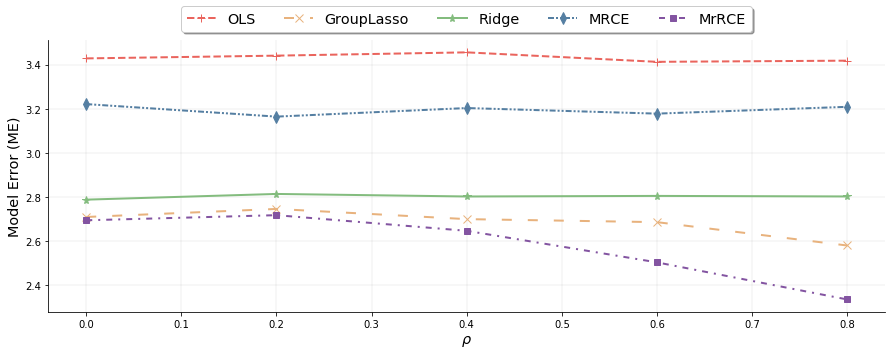

In [10]:
display(t_test(data))
fig, ax = plot(data)

In [11]:
fig.savefig("plots/identity_full.png", bbox_inches='tight')

## AR dense

In [12]:
data = get_data("full-simulations-results/ar_dense.csv")

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,6.706459e-33,6.384621e-26,1.382136e-33,5.096280e-44,8.259934e-60
MRCE,2.895359e-12,5.467184e-07,5.314673e-10,5.319920e-21,2.385107e-35
OLS,4.818500e-27,4.517625e-24,5.104729e-34,1.816043e-45,1.614851e-62
Ridge,1.832838e-20,3.558748e-13,6.421084e-25,6.675235e-45,4.573754e-62


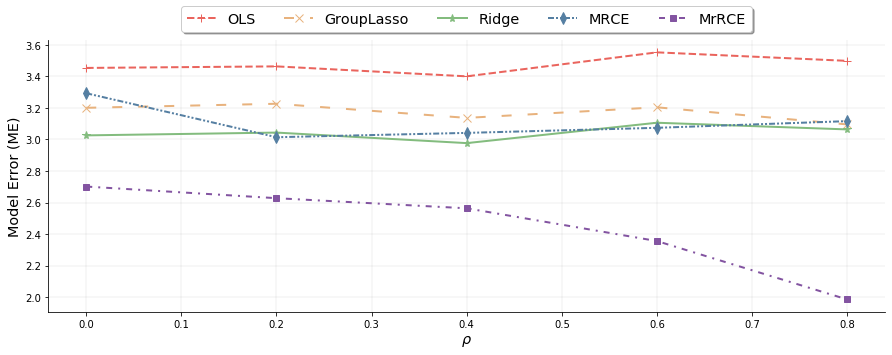

In [13]:
display(t_test(data))
fig, _ = plot(data)
fig.savefig("plots/ar_dense_full.png", bbox_inches='tight')

## AR sparse

In [14]:
ar_dense = data.copy()

In [15]:
data = get_data("full-simulations-results/ar_sparse.csv")

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,3.776682e-19,1.563315e-23,1.467052e-27,1.072144e-31,9.150660e-46
MRCE,4.791588e-04,1.054455e-09,3.937794e-13,6.250345e-18,3.258335e-32
OLS,5.030218e-37,2.108110e-39,3.547337e-45,2.218872e-52,3.690253e-51
Ridge,1.031264e-23,2.731966e-25,1.893632e-30,1.355672e-39,2.922390e-47


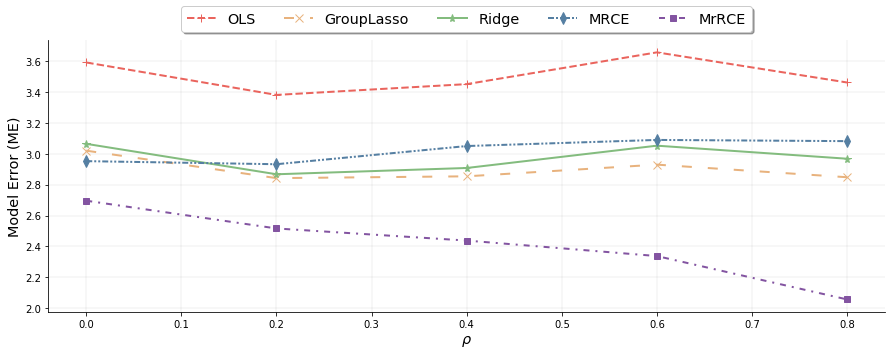

In [16]:
display(t_test(data))
fig, _ = plot(data)
fig.savefig("plots/ar_sparse_full.png", bbox_inches='tight')

## Both AR

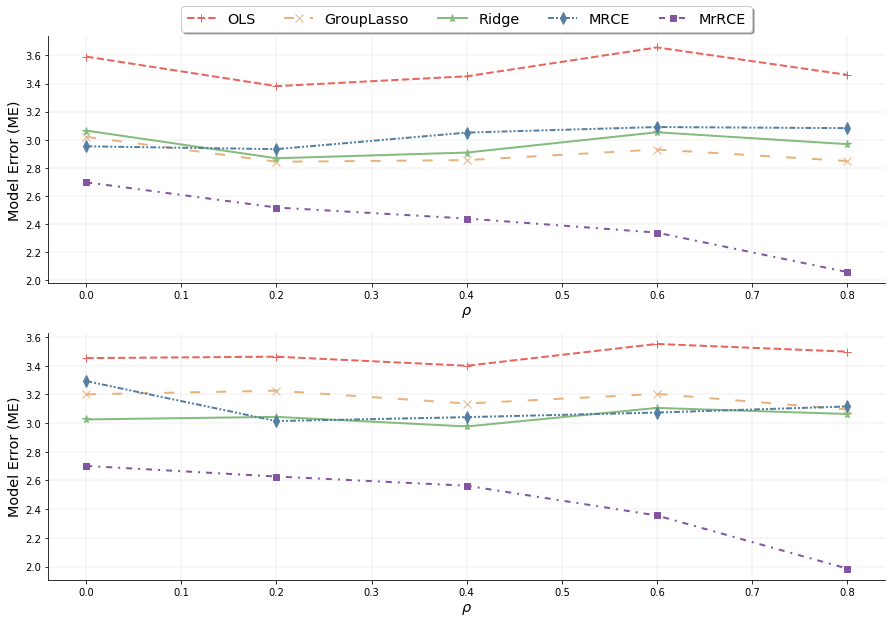

In [17]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))
plot(data, ax=axes[0])
plot(ar_dense, ax=axes[1], legend=False)

fig.savefig("plots/ar_sparse_dense_full.png", bbox_inches='tight')

## Equi

In [18]:
data = get_data("full-simulations-results/equi.csv")

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,1.094327e-42,5.436506e-42,1.727072e-47,2.172888e-53,2.804710e-61
MRCE,6.302719e-09,1.828860e-10,1.628482e-10,2.372929e-19,2.075753e-35
OLS,1.699702e-42,2.757219e-37,1.722752e-39,1.781721e-53,1.408145e-55
Ridge,5.535146e-43,1.029715e-34,3.209862e-39,3.488981e-53,2.721897e-60


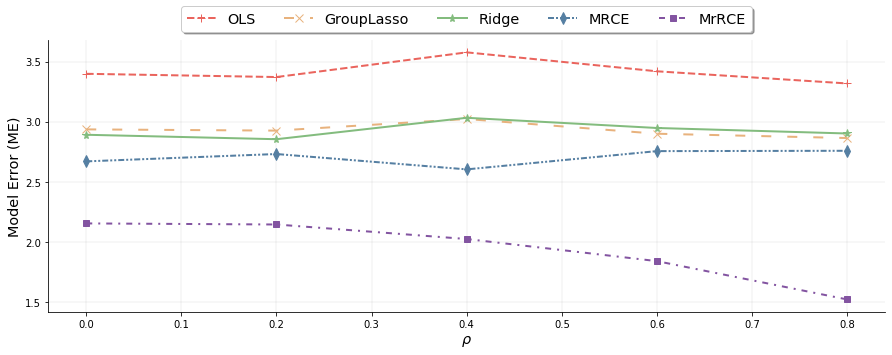

In [19]:
display(t_test(data))
fig, _ = plot(data)
fig.savefig("plots/equi_full.png", bbox_inches='tight')

## FGN

In [20]:
data = get_data("full-simulations-results/fgn.csv")

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,4.424107e-39,7.725811e-43,8.272071e-46,4.137811e-53,4.869331e-57
MRCE,5.814335e-20,1.455682e-24,3.969335e-29,2.111345e-39,7.674220e-44
OLS,8.725864e-30,2.781868e-35,1.116611e-32,1.984061e-42,3.370678e-50
Ridge,3.330106e-29,7.267003e-30,1.049955e-33,4.085858e-43,1.954813e-52


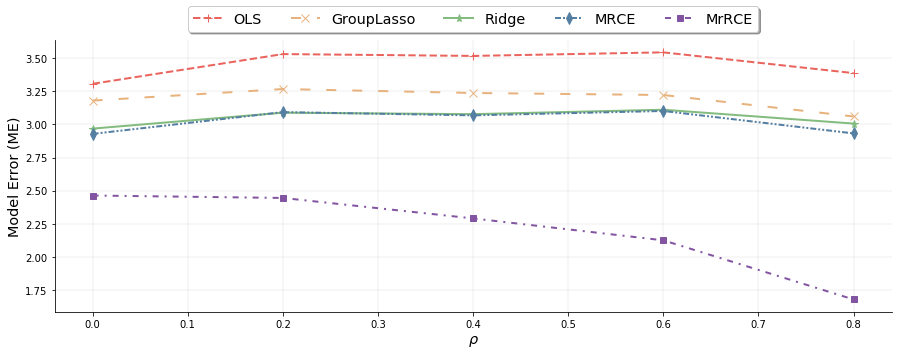

In [21]:
display(t_test(data))
fig, _ = plot(data)
fig.savefig("plots/fgn_full.png", bbox_inches='tight')

## Additional Experiments - for revision

### Varying data size

In [11]:
cols = ['GroupLasso', 'MrRCE', 'OLS', 'Ridge', 'rho', 'MRCE']

In [19]:
ar_dense_n100 = pd.read_csv("full-simulations-results/ar_dense_n100.csv")

In [20]:
ar_dense_n100[cols].groupby('rho').agg(['mean', 'std'])

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0.0   1.214403  0.297960  1.125995  0.264565  1.251298  0.315711  1.188427   
0.2   1.267072  0.306146  1.182222  0.287719  1.285127  0.329479  1.232991   
0.4   1.240765  0.275199  1.132000  0.251740  1.270332  0.312994  1.214219   
0.6   1.219826  0.271707  1.087588  0.253083  1.261047  0.308720  1.204177   
0.8   1.261401  0.283682  1.021027  0.226008  1.297481  0.318367  1.250035   

                   MRCE            
          std      mean       std  
rho                                
0.0  0.290446  1.188539  0.286022  
0.2  0.305167  1.236426  0.308987  
0.4  0.286003  1.220712  0.289156  
0.6  0.276474  1.207523  0.280324  
0.8  0.295318  1.254925  0.306511

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,2.317750e-27,2.400640e-22,3.092171e-29,1.529901e-28,3.075352e-48
OLS,1.135641e-26,5.688465e-18,3.570405e-26,7.205008e-26,9.383578e-41
Ridge,3.824257e-18,2.803580e-11,5.836101e-19,4.862843e-21,1.298234e-40
MRCE,7.736692e-13,3.073090e-12,5.351165e-16,1.161145e-18,7.024104e-38


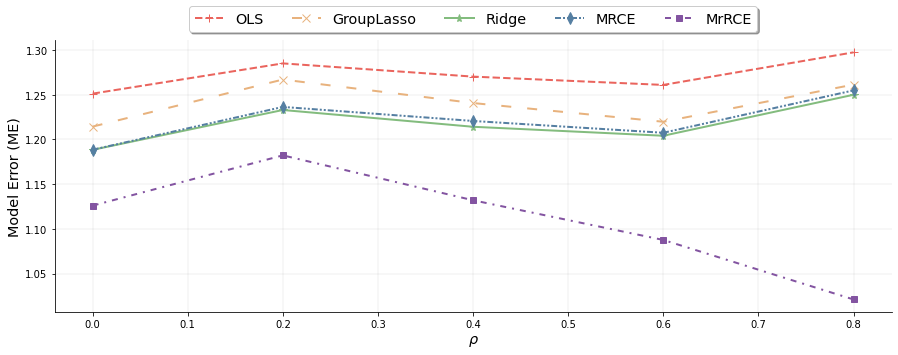

In [23]:
display(t_test(ar_dense_n100))
fig, _ = plot(ar_dense_n100)

---

In [21]:
ar_dense_n150 = pd.read_csv("full-simulations-results/ar_dense_n150.csv")
ar_dense_n150[cols].groupby('rho').agg(['mean', 'std'])

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0.0   0.755663  0.194712  0.740374  0.192410  0.762478  0.201849  0.744741   
0.2   0.787148  0.171412  0.770328  0.173175  0.793163  0.181587  0.775738   
0.4   0.768457  0.174102  0.743202  0.171351  0.776786  0.184919  0.756663   
0.6   0.762082  0.174042  0.731298  0.170072  0.768751  0.186275  0.749794   
0.8   0.752660  0.182631  0.697702  0.159730  0.770401  0.190140  0.748905   

                   MRCE            
          std      mean       std  
rho                                
0.0  0.193304  0.759813  0.199209  
0.2  0.173260  0.781995  0.178660  
0.4  0.174911  0.763851  0.187246  
0.6  0.176699  0.765341  0.184472  
0.8  0.181163  0.758720  0.186737

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,8.068366e-18,5.522478e-17,3.727528e-25,7.228352e-23,4.418477e-31
OLS,4.896149e-17,4.144059e-16,3.534230e-27,3.657079e-23,1.886684e-34
Ridge,1.523630e-06,2.037386e-07,1.701156e-13,1.374053e-13,4.424645e-28
MRCE,3.621389e-06,6.840119e-03,1.638497e-05,2.109542e-10,2.590812e-21


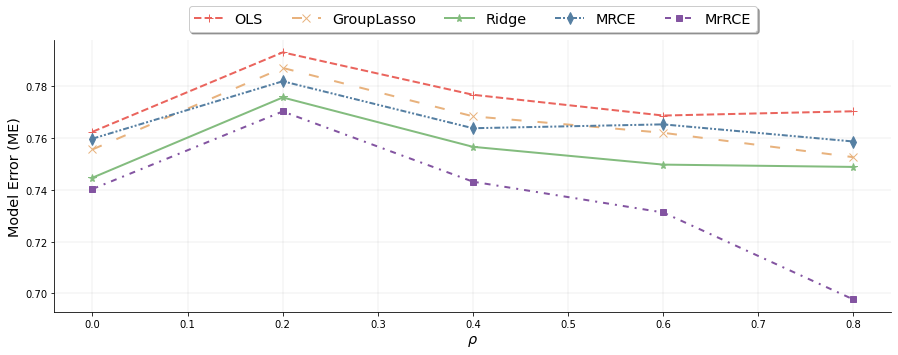

In [24]:
display(t_test(ar_dense_n150))
fig, _ = plot(ar_dense_n150)

---

In [22]:
ar_dense_n200 = pd.read_csv("full-simulations-results/ar_dense_n200.csv")
ar_dense_n200[cols].groupby('rho').agg(['mean', 'std'])

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0.0   0.552408  0.135144  0.546585  0.134902  0.556011  0.137167  0.547382   
0.2   0.533011  0.111056  0.525340  0.109976  0.536938  0.117960  0.527600   
0.4   0.552374  0.121224  0.540887  0.119655  0.555864  0.124385  0.546891   
0.6   0.559189  0.132427  0.541516  0.127643  0.563924  0.137282  0.553641   
0.8   0.565570  0.109515  0.536112  0.104285  0.572456  0.116514  0.563565   

                   MRCE            
          std      mean       std  
rho                                
0.0  0.134451  0.564623  0.144783  
0.2  0.111616  0.539602  0.120826  
0.4  0.121113  0.562496  0.120636  
0.6  0.132480  0.564775  0.134118  
0.8  0.111960  0.580512  0.121342

rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,1.076260e-08,1.756996e-11,4.362863e-18,6.618299e-24,2.123467e-31
OLS,1.993350e-14,5.467682e-15,4.284568e-18,1.940397e-28,3.773106e-32
Ridge,5.031863e-03,6.848908e-06,1.003703e-10,1.830769e-21,1.036824e-28
MRCE,4.604355e-08,8.042665e-06,1.668097e-11,3.185073e-13,8.240985e-25


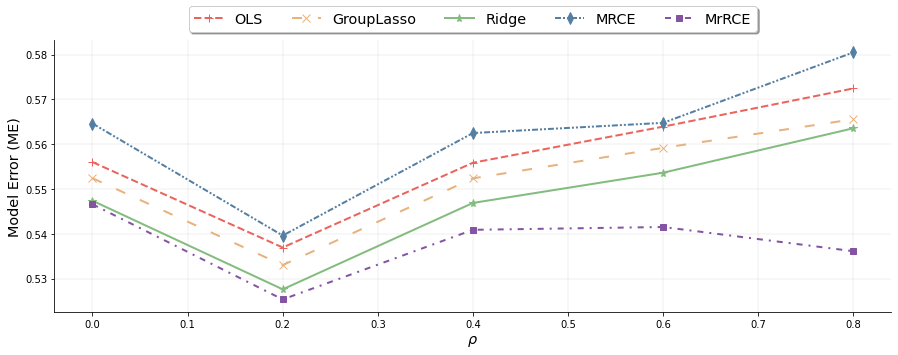

In [25]:
display(t_test(ar_dense_n200))
fig, _ = plot(ar_dense_n200)

### Varying the number of predictors

GroupLasso                MrRCE                      OLS                \
          mean       std       mean       std           mean           std   
rho                                                                          
0.0  23.245071  4.837559  19.122228  3.247406  196108.099971  1.952102e+06   
0.2  22.868272  4.265083  18.837230  3.378889  365094.497693  4.845557e+06   
0.4  23.888472  6.472394  19.317033  4.542257   23189.252877  1.094025e+05   
0.6  24.244664  6.615562  18.150161  4.195660  484135.984854  6.569681e+06   
0.8  24.631404  7.577823  16.584830  4.780204  191433.867181  2.470256e+06   

         Ridge                  MRCE             
          mean       std        mean        std  
rho                                              
0.0  21.184917  5.841970  245.347913  36.348354  
0.2  20.695394  4.553444  251.439254  41.616086  
0.4  21.362568  6.055396  244.072225  43.686331  
0.6  20.992753  5.545088  255.095793  56.876834  
0.8  20.889721  6.086324  247.574758  68.027549

----------------------------------------------------------------------------------------------------


rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,8.591913e-35,8.519015e-35,1.654843e-26,7.033971e-35,3.910605e-42
OLS,7.850194e-02,1.439700e-01,1.545994e-03,1.493079e-01,1.372327e-01
Ridge,7.587125e-08,3.197732e-10,1.546804e-07,8.981051e-16,5.450321e-31
MRCE,3.855364e-160,5.050406e-152,5.413405e-147,3.085171e-128,1.030123e-112


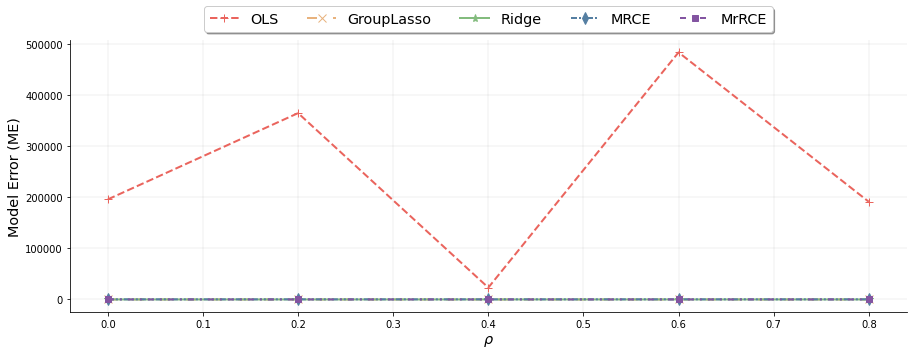

In [80]:
tmp = pd.read_csv("full-simulations-results/ar_dense_p50.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)

GroupLasso               MrRCE                  OLS                 Ridge  \
          mean       std      mean       std       mean        std       mean   
rho                                                                             
0.0  12.810902  2.878341  9.982001  2.047172  23.358580  11.124420  11.653491   
0.2  12.338502  2.926268  9.594953  2.137790  23.006913  12.099548  11.766921   
0.4  12.328446  3.104496  9.232068  2.052862  22.457931   9.724883  11.290404   
0.6  12.153771  3.112702  8.578814  1.914568  22.574061  10.168982  11.453999   
0.8  12.092978  3.884823  7.679534  1.796827  23.362365  10.228658  11.416503   

                     MRCE             
          std        mean        std  
rho                                   
0.0  2.846064  200.866148  32.100599  
0.2  3.667934  198.035820  37.423352  
0.4  2.822525  196.030531  42.717945  
0.6  2.926814  198.612793  50.937827  
0.8  3.799016  199.474213  67.132818

----------------------------------------------------------------------------------------------------


rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,4.016797e-45,1.196172e-49,1.750741e-41,1.834501e-44,1.859255e-44
OLS,1.986827e-42,2.731559e-39,3.801034e-50,2.427613e-50,2.923716e-57
Ridge,4.286472e-26,4.626204e-21,1.082858e-30,1.696552e-37,7.470426e-41
MRCE,4.528486e-158,7.039329e-143,9.841393e-133,7.981980e-120,1.219052e-98


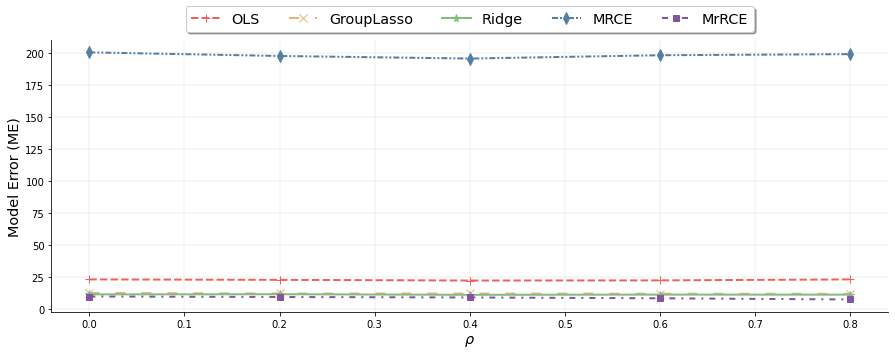

In [82]:
tmp = pd.read_csv("full-simulations-results/ar_dense_p40.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0.0   6.532140  1.462253  5.244983  1.012758  7.852761  2.434886  6.028418   
0.2   6.309590  1.433917  5.005733  1.048816  7.778732  2.557040  5.877796   
0.4   6.337012  1.373889  4.719248  0.849318  7.819301  2.378258  5.980640   
0.6   6.336131  1.796544  4.368262  0.919657  7.720651  2.435568  6.075487   
0.8   6.292192  1.828206  3.717686  0.795119  8.186404  2.603905  6.251365   

                     MRCE             
          std        mean        std  
rho                                   
0.0  1.303025  150.119250  30.456340  
0.2  1.279576  144.588267  30.535080  
0.4  1.330898  152.847054  38.420595  
0.6  1.745142  144.116335  46.616949  
0.8  1.786738  137.727750  55.094846

----------------------------------------------------------------------------------------------------


rho,0.0,0.2,0.4,0.6,0.8
GroupLasso,1.358934e-45,4.368469e-46,1.618183e-55,4.687977e-47,1.704673e-53
OLS,3.400476e-42,7.434449e-42,6.641339e-52,3.519716e-56,7.803874e-68
Ridge,7.296408e-33,5.668733e-34,1.347925e-44,7.205786e-43,1.924556e-57
MRCE,2.975407e-139,5.577058e-136,4.429900e-122,7.210077e-102,5.697874e-86


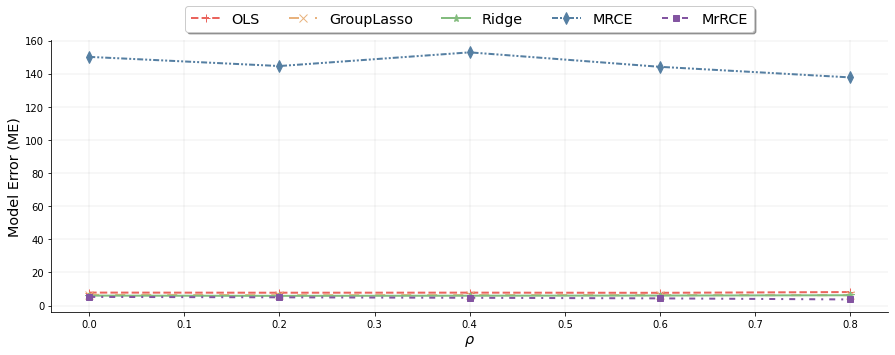

In [83]:
tmp = pd.read_csv("full-simulations-results/ar_dense_p30.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)

### The estimation of $\sigma,\rho$

In [36]:
import seaborn as sns

In [70]:
def plot_rho(data, figsize=(15, 5), ax=None, legend=True):
    fig = None
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    # to_plot = data.groupby('rho', as_index=False).mean().melt(id_vars='rho')
    my_pal = {0: "#ea645d", .2: "#e8b27d", .4: "#83bc7e", .6: "#557fa2", .8: "#8354a1"}
    my_pal = {0: "#557fa2", .2: "#557fa2", .4: "#557fa2", .6: "#557fa2", .8: "#557fa2"}
    sns.boxplot(
        data.rho, data.rho_hat, ax=ax, palette=my_pal
    )
    

    ax.set_xlabel('$\\rho$', fontsize='xx-large')
    ax.set_ylabel('$\\hat{\\rho}$  (estimation)', fontsize='xx-large')
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    return fig, ax


def plot_sig(data, figsize=(15, 5), ax=None, legend=True):
    fig = None
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    # to_plot = data.groupby('rho', as_index=False).mean().melt(id_vars='rho')
    my_pal = {0: "#ea645d", .2: "#e8b27d", .4: "#83bc7e", .6: "#557fa2", .8: "#8354a1"}
    my_pal = {0: "#557fa2", .2: "#557fa2", .4: "#557fa2", .6: "#557fa2", .8: "#557fa2"}
    sns.boxplot(
        data.rho, data.sigma_hat, ax=ax, palette=my_pal
    )
    

    ax.set_xlabel('$\\rho$', fontsize='xx-large')
    ax.set_ylabel('$\\hat{\\sigma}$  (estimation)', fontsize='xx-large')
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    return fig, ax

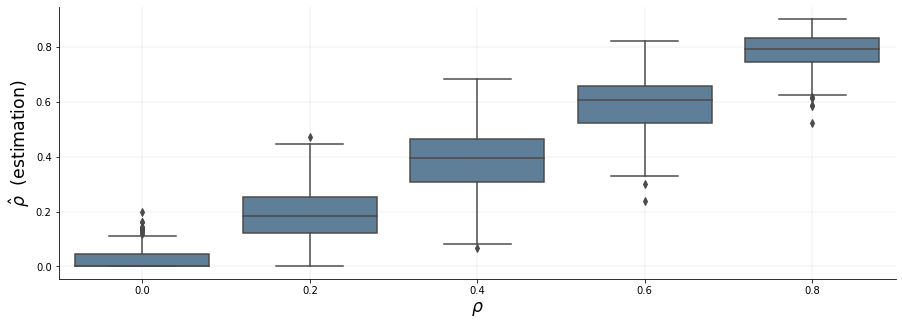

In [76]:
fig, _ = plot_rho(ar_dense_n100)
fig.savefig("plots/ar_dense_n100_rho.png", bbox_inches='tight')

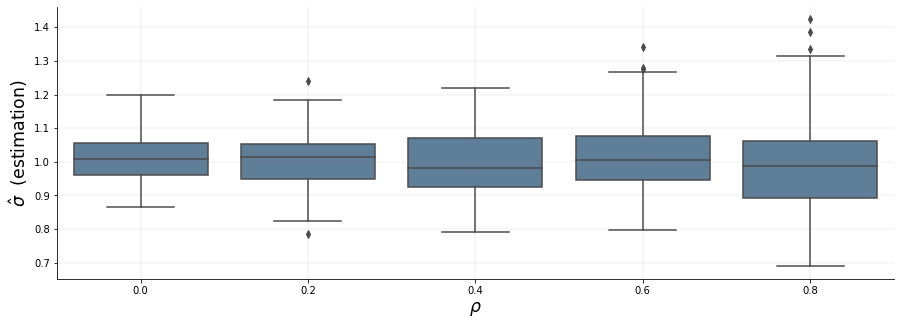

In [77]:
fig, _ = plot_sig(ar_dense_n100)
fig.savefig("plots/ar_dense_n100_sigma.png", bbox_inches='tight')

### Unif $\Gamma$

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0     2.896296  0.710838  2.147375  0.439638  3.583228  1.218831  2.969658   

                   MRCE           
          std      mean      std  
rho                               
0    0.821584  3.116969  0.94398

----------------------------------------------------------------------------------------------------


rho,0
GroupLasso,1.070942e-52
MRCE,7.679195e-42
OLS,4.113984e-46
Ridge,1.507456e-46


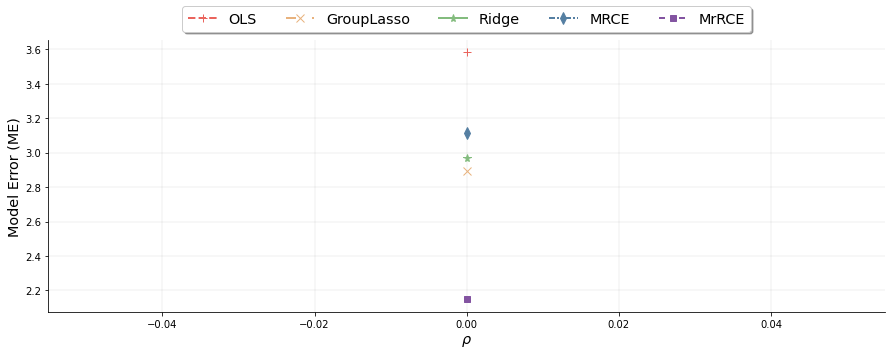

In [84]:
tmp = pd.read_csv("full-simulations-results/ar_dense_unif.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)

GroupLasso               MrRCE                 OLS               Ridge  \
          mean       std      mean       std      mean       std      mean   
rho                                                                          
0     2.594311  0.787302  1.523158  0.447445  3.303585  1.358045  2.774716   

                   MRCE            
          std      mean       std  
rho                                
0    0.816047  2.517996  0.979924

----------------------------------------------------------------------------------------------------


rho,0
GroupLasso,2.635871e-63
MRCE,7.185521e-42
OLS,2.591865e-51
Ridge,3.933470e-72


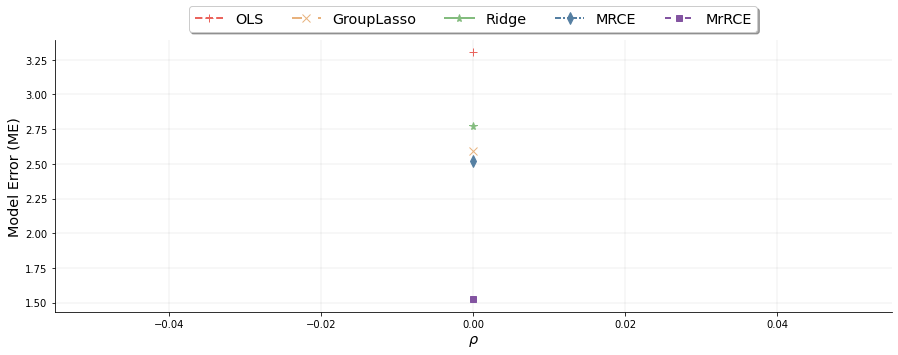

In [85]:
tmp = pd.read_csv("full-simulations-results/equi_unif.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)

GroupLasso               MrRCE                 OLS              Ridge  \
          mean       std      mean       std      mean       std     mean   
rho                                                                         
0     2.913546  0.788089  1.808973  0.469802  3.468112  1.308911  2.92699   

                   MRCE            
          std      mean       std  
rho                                
0    0.857382  2.831807  0.985659

----------------------------------------------------------------------------------------------------


rho,0
GroupLasso,8.605373e-69
MRCE,7.603488e-44
OLS,6.362758e-50
Ridge,3.604922e-57


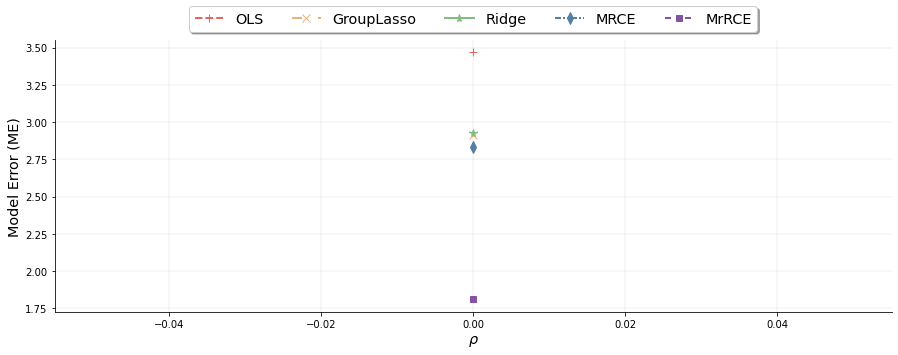

In [86]:
tmp = pd.read_csv("full-simulations-results/fgn_unif.csv")
display(tmp[cols].groupby('rho').agg(['mean', 'std']))
print("-"*100)
display(t_test(tmp))
fig, _ = plot(tmp)